<a href="https://www.kaggle.com/code/michaelrocchio/dnn-cnn-transformer-with-keras?scriptVersionId=93947254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Data Pull & Any functions I make up
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

image_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train=x_train.astype(float)
x_test=x_test.astype(float)
y_train=y_train.astype(int)
y_test=y_test.astype(int)
X_train = x_train/255
X_test = x_test/255
sets=[X_train, y_train, X_test, y_test]
for i in sets:
  print('{} shape: {}'.format(namestr(i,globals()), i.shape))
DNN_X_train=X_train.reshape(X_train.shape[0], 3072)
DNN_X_test=X_test.reshape(X_test.shape[0], 3072)

170508288/170498071 [==============================] - 8s 0us/step
['X_train', 'i'] shape: (50000, 32, 32, 3)
['y_train', 'i'] shape: (50000, 1)
['X_test', 'i'] shape: (10000, 32, 32, 3)
['y_test', 'i'] shape: (10000, 1)


# NOTE: 
## If you are here for the Transformer or the CNN Models, please go to the bottom of the notebook. The best model is the last one!

##### The purpose of this notebook is to show the different outputs of different models and is thus a great reference on how to code various architectures. 

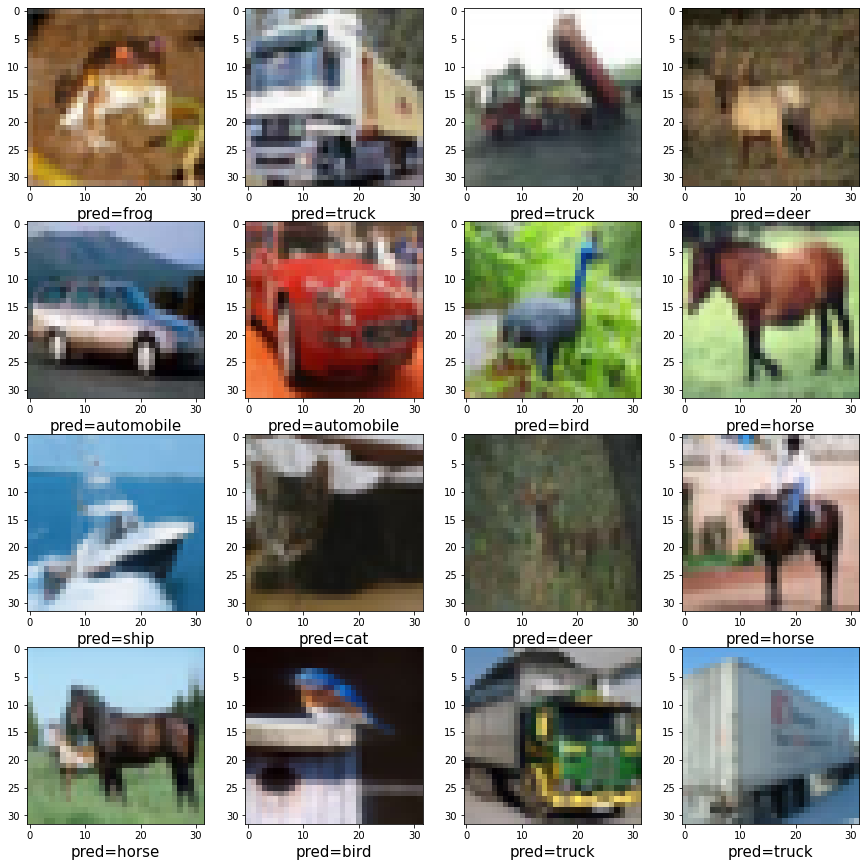

In [2]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i].astype(int))
    plt.xlabel('pred={}'.format(image_dict[y_train[i].item()]), fontsize=15)
plt.show()

# Experiment 1 DNN

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import models
model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=[3072]))
model1.add(Dense(10, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


2022-04-25 09:13:01.090873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 09:13:01.204624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 09:13:01.205357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 09:13:01.206442: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
history1=model1.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120, verbose=1)

2022-04-25 09:13:03.751027: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-25 09:13:04.395239: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-25 09:13:04.850893: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/120
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9238 - accuracy: 0.3058 - val_loss: 1.8552 - val_accuracy: 0.3488
Epoch 2/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7887 - accuracy: 0.3632 - val_loss: 1.7391 - val_accuracy: 0.3831
Epoch 3/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7462 - accuracy: 0.3801 - val_loss: 1.7336 - val_accuracy: 0.3836
Epoch 4/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7247 - accuracy: 0.3868 - val_loss: 1.7426 - val_accuracy: 0.3725
Epoch 5/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7083 - accuracy: 0.3923 - val_loss: 1.7027 - val_accuracy: 0.3941
Epoch 6/120
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6988 - accuracy: 0.3954 - val_loss: 1.6986 - val_accuracy: 0.4020
Epoch 7/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6875 - accuracy: 0.4021 - val_loss: 1.6853 - val_ac

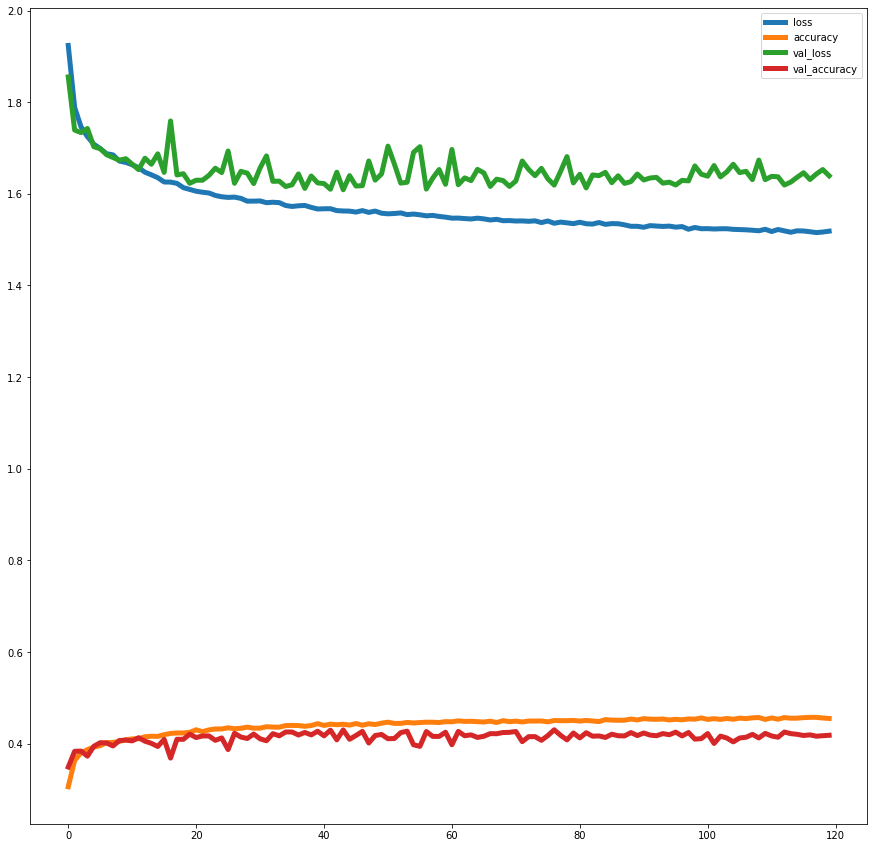

In [5]:
from matplotlib.pyplot import figure
plt.figure(figsize=(15,15))
history1_df=pd.DataFrame(history1.history)
plt.plot(history1_df, linewidth=5)
plt.legend(history1_df.columns.to_list())
plt.show()

There is evidence of overtraining for this DNN even with the little accuracy that it is able to achieve. This is to be expected as it cannot distinguish features from the training vectors and a flat DNN has been proven to be inneffective. Additionally our baseline of 120 epoch proved to only increase the overtraining of the set.

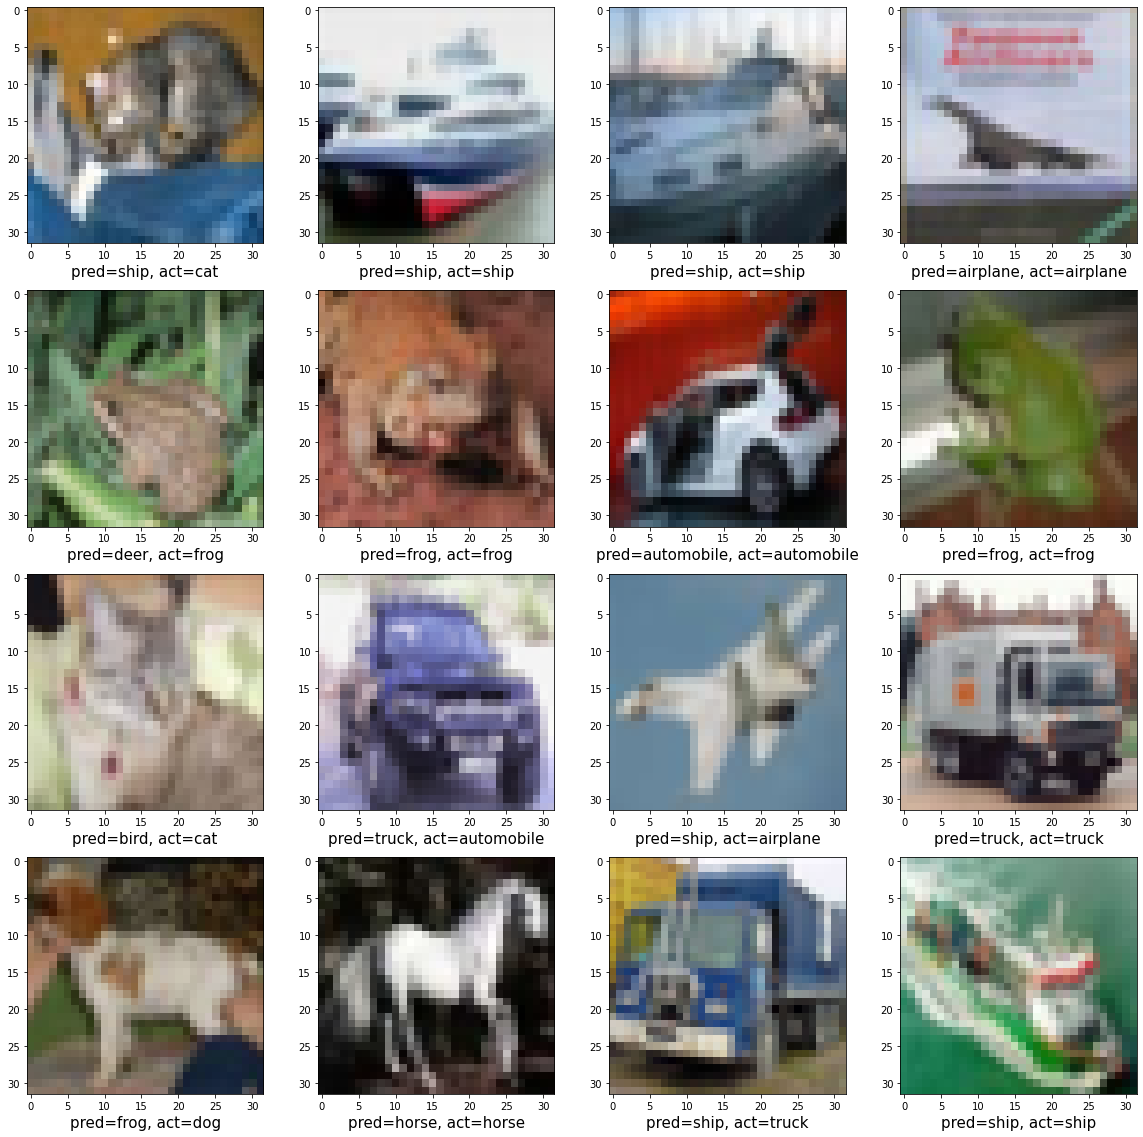

In [6]:
y_pred = model1.predict(DNN_X_test)
y_pred = y_pred.argmax(axis=-1)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

# Experiment 2 DNN

In [7]:
keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=[3072]))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 635,710
Trainable params: 635,710
Non-trainable params: 0
_________________________________________________________________


In [8]:
history2=model2.fit(DNN_X_train, y_train, batch_size=32, validation_data=(DNN_X_test, y_test), epochs=120, verbose=1)

2022-04-25 09:20:55.290675: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-25 09:20:56.045928: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/120
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8796 - accuracy: 0.3218 - val_loss: 1.7308 - val_accuracy: 0.3809
Epoch 2/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7059 - accuracy: 0.3878 - val_loss: 1.6521 - val_accuracy: 0.4022
Epoch 3/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6228 - accuracy: 0.4175 - val_loss: 1.6337 - val_accuracy: 0.4208
Epoch 4/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5692 - accuracy: 0.4399 - val_loss: 1.5988 - val_accuracy: 0.4329
Epoch 5/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5348 - accuracy: 0.4523 - val_loss: 1.5361 - val_accuracy: 0.4484
Epoch 6/120
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5027 - accuracy: 0.4633 - val_loss: 1.5028 - val_accuracy: 0.4709
Epoch 7/120
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4762 - accuracy: 0.4724 - val_loss: 1.5184 - val_ac

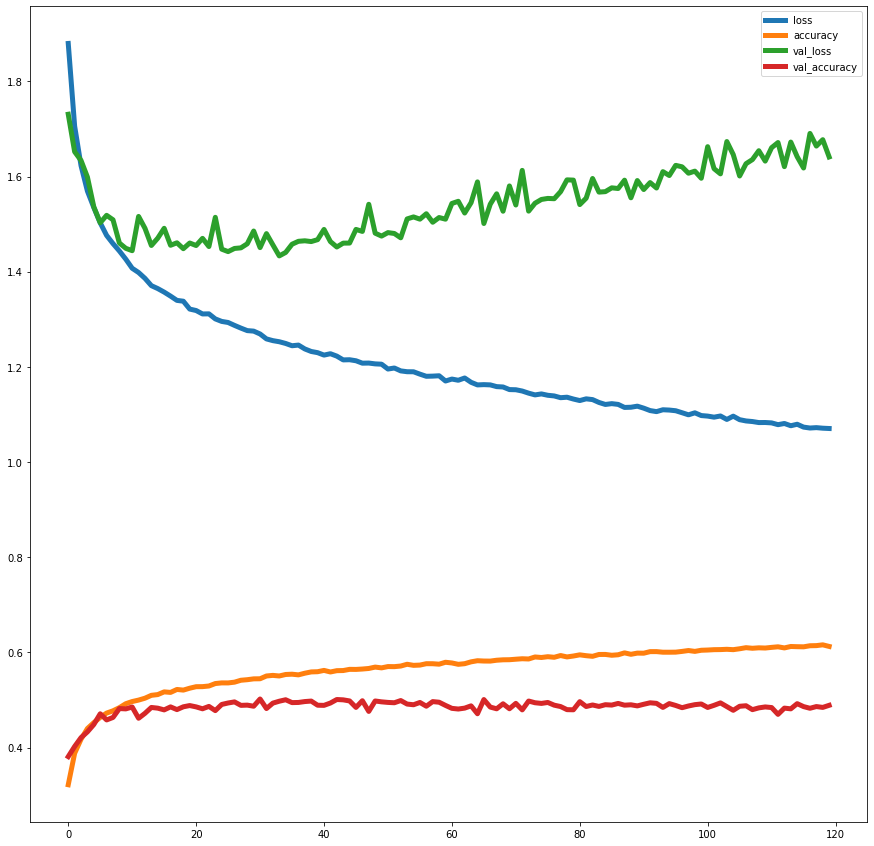

In [9]:
plt.figure(figsize=(15,15))
history2_df=pd.DataFrame(history2.history)
plt.plot(history2_df, linewidth=5)
plt.legend(history2_df.columns.to_list())
plt.show()

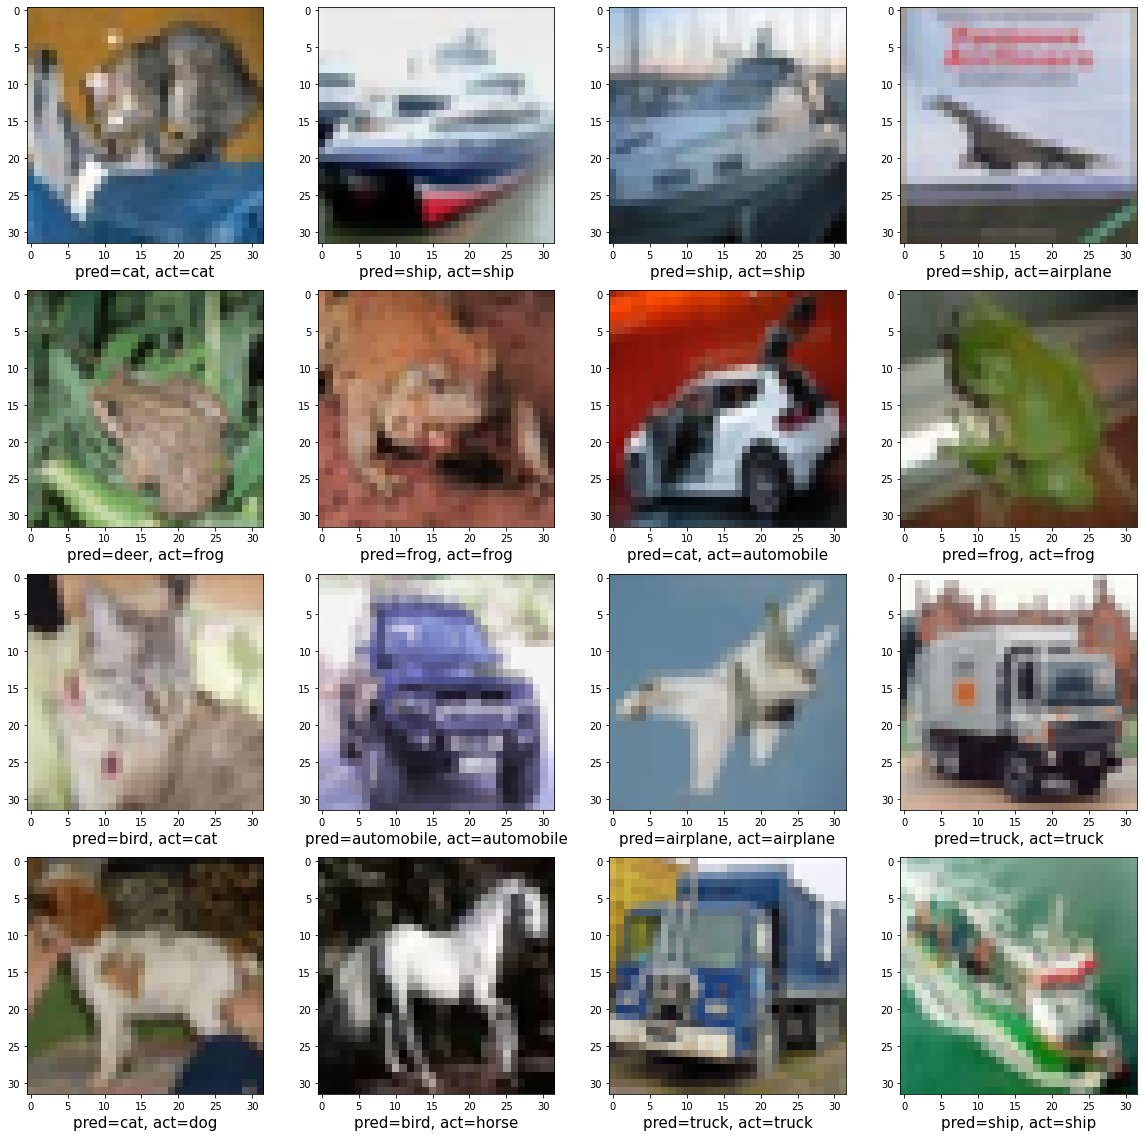

In [10]:
y_pred2 = model2.predict(DNN_X_test)
y_pred2 = y_pred2.argmax(axis=-1)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred2[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

# Experiment 3 Basic CNN

In [11]:
keras.backend.clear_session()
model3=keras.models.Sequential()
model3.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model3.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
# model3.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model3.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model3.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
# model3.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding = "same"))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128,activation='relu'))
# model3.add(keras.layers.Dropout(0.5))
model3.add(keras.layers.Dense(10))
model3.add(keras.layers.Activation('softmax'))
model3.summary()
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
history3=model3.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=120, verbose=2)

2022-04-25 09:30:13.124749: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/120


2022-04-25 09:30:15.239128: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 - 12s - loss: 1.6042 - accuracy: 0.4137 - val_loss: 1.3913 - val_accuracy: 0.4903
Epoch 2/120
1563/1563 - 5s - loss: 1.2848 - accuracy: 0.5380 - val_loss: 1.2142 - val_accuracy: 0.5611
Epoch 3/120
1563/1563 - 5s - loss: 1.1359 - accuracy: 0.5930 - val_loss: 1.1398 - val_accuracy: 0.5931
Epoch 4/120
1563/1563 - 5s - loss: 1.0261 - accuracy: 0.6325 - val_loss: 1.1199 - val_accuracy: 0.5980
Epoch 5/120
1563/1563 - 5s - loss: 0.9358 - accuracy: 0.6675 - val_loss: 1.1468 - val_accuracy: 0.5957
Epoch 6/120
1563/1563 - 5s - loss: 0.8515 - accuracy: 0.6971 - val_loss: 1.0811 - val_accuracy: 0.6204
Epoch 7/120
1563/1563 - 6s - loss: 0.7790 - accuracy: 0.7227 - val_loss: 1.1409 - val_accuracy: 0.6112
Epoch 8/120
1563/1563 - 5s - loss: 0.7110 - accuracy: 0.7455 - val_loss: 1.1425 - val_accuracy: 0.6194
Epoch 9/120
1563/1563 - 5s - loss: 0.6437 - accuracy: 0.7700 - val_loss: 1.1589 - val_accuracy: 0.6189
Epoch 10/120
1563/1563 - 5s - loss: 0.5848 - accuracy: 0.7920 - val_loss: 1.2305 - v

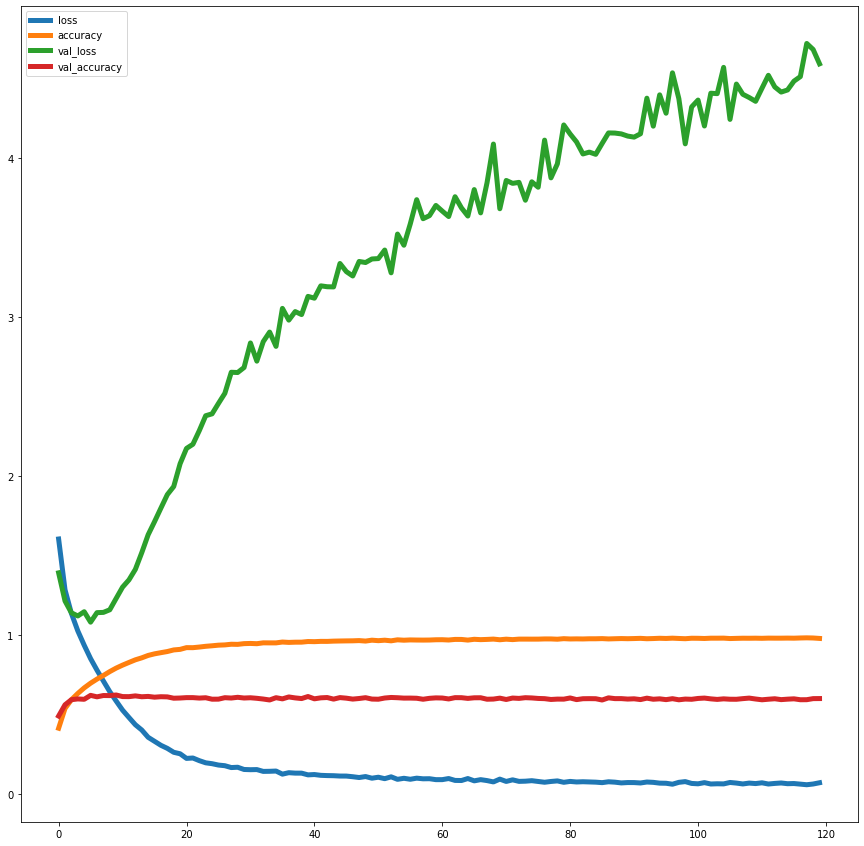

In [13]:
plt.figure(figsize=(15,15))
history3_df=pd.DataFrame(history3.history)
plt.plot(history3_df, linewidth=5)
plt.legend(history3_df.columns.to_list())
plt.show()

### This model shows evidence of overtraining. To recuce that we can add dropout layers and kernel normalization.

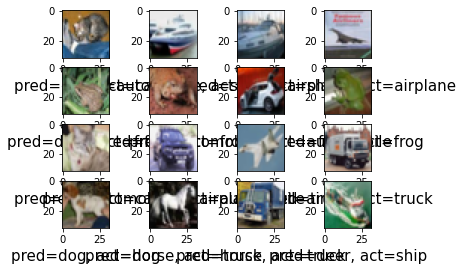

In [14]:
y_pred3 = model3.predict(X_test)
y_pred3 = y_pred3.argmax(axis=-1)
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred3[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

In [15]:
keras.backend.clear_session()
model4=keras.models.Sequential()
model4.add(keras.layers.Conv2D(64,3,3,padding = 'same', activation ='relu', input_shape=(32,32,3)))
model4.add(keras.layers.Conv2D(64,3,3,padding = "same", activation = "relu"))
model4.add(keras.layers.Dropout(0.1))
model4.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Conv2D(128,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Conv2D(256,3,3,padding = 'same', activation = 'relu'))
model4.add(keras.layers.Dropout(0.3))
model4.add(keras.layers.Dense(10))
model4.add(keras.layers.Activation('softmax'))
model4.summary()
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 256)         2

In [16]:
history4=model4.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), verbose=2)

1563/1563 - 8s - loss: 1.7689 - accuracy: 0.1060 - val_loss: 1.5133 - val_accuracy: 0.1107


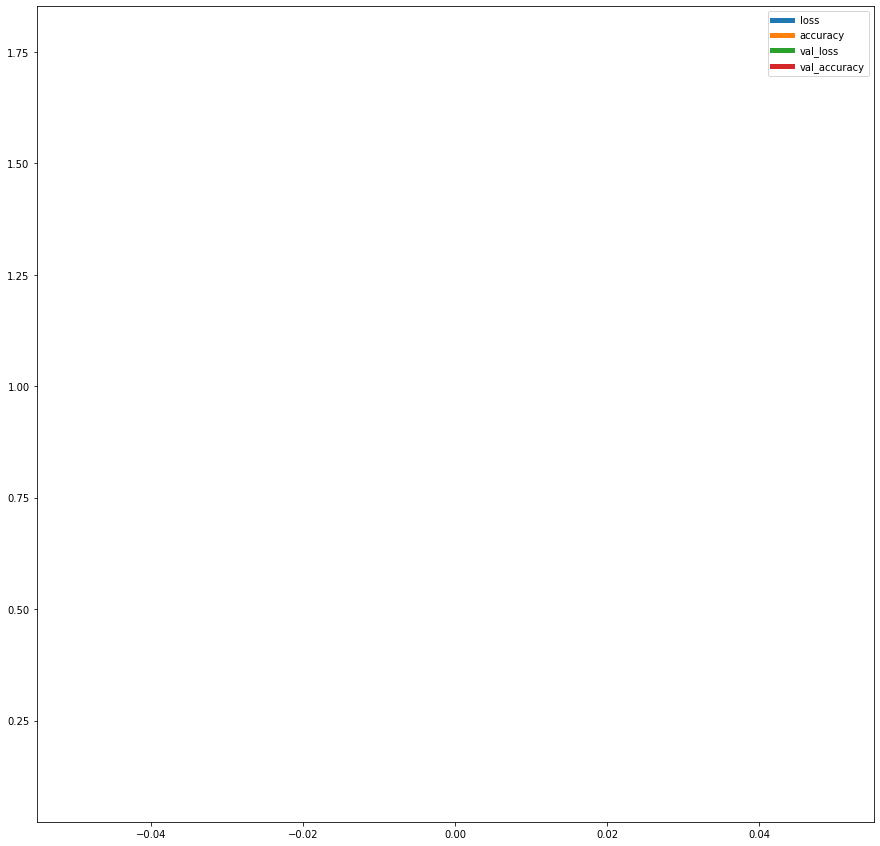

In [17]:
plt.figure(figsize=(15,15))
history4_df=pd.DataFrame(history4.history)
plt.plot(history4_df, linewidth=5)
plt.legend(history4_df.columns.to_list())
plt.show()

##### upon adding dropout between the convolutional layers we can see our model has improved.

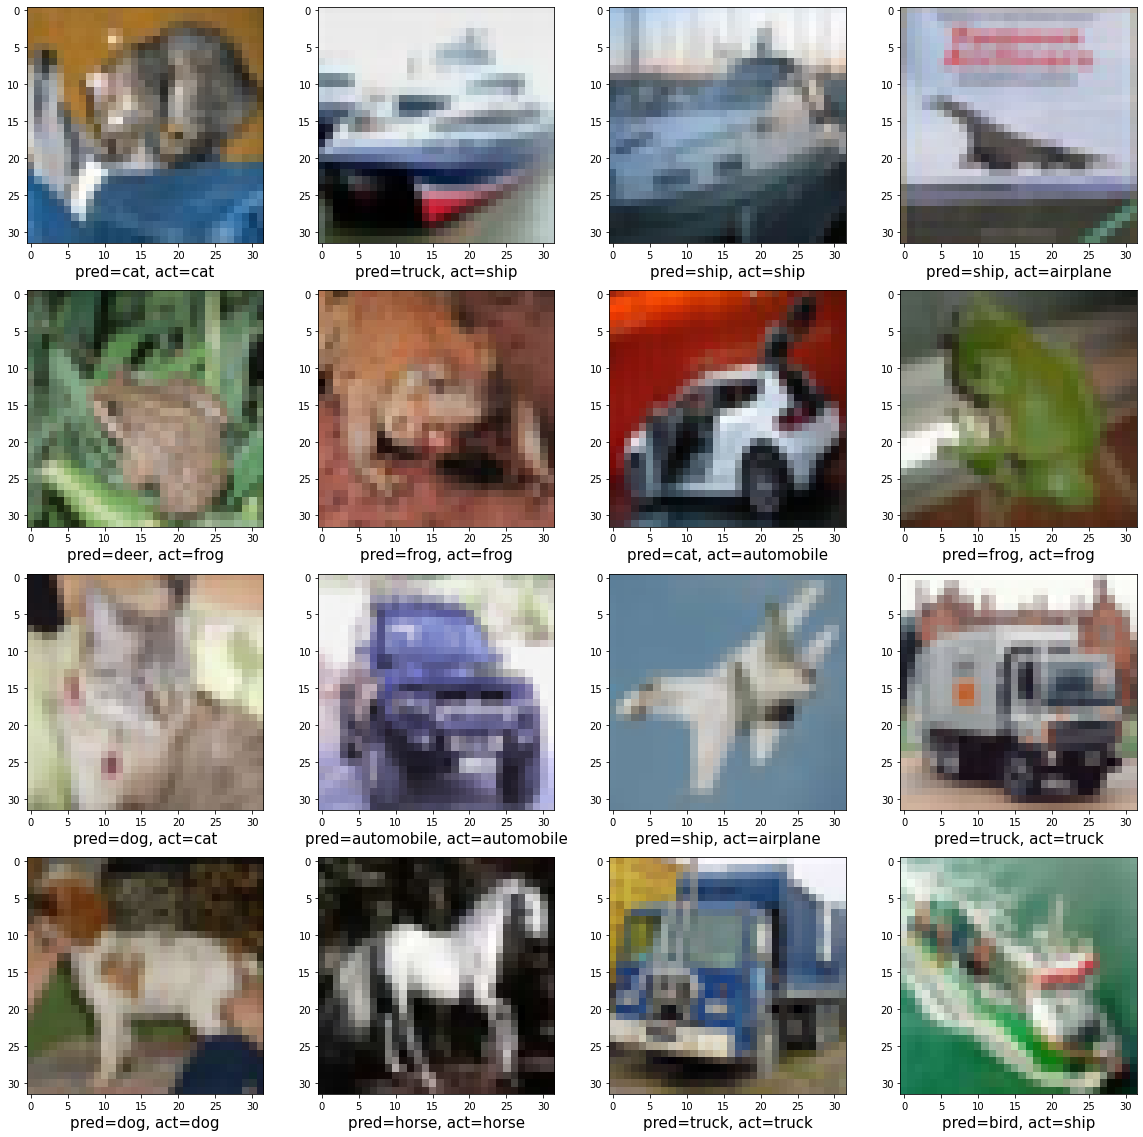

In [18]:
y_pred4 = model4.predict(X_test)
y_pred4 = y_pred4.argmax(axis=-1)
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred4[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

### below I will add an example of the weighting of the convolutional layers in the prior model.

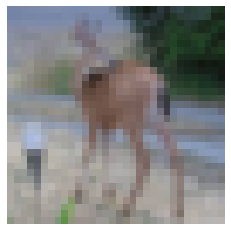

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


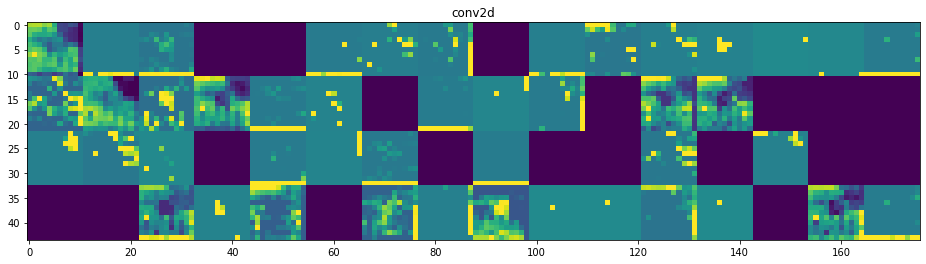

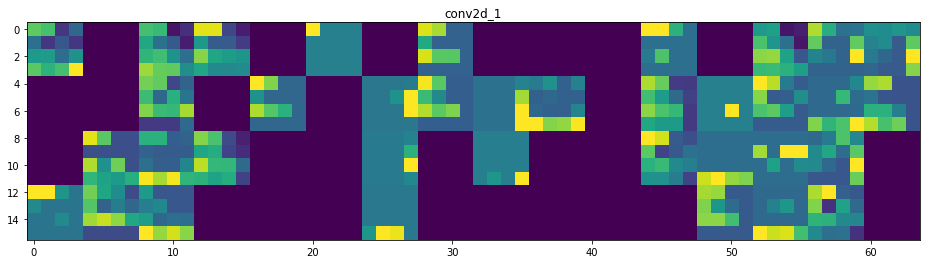

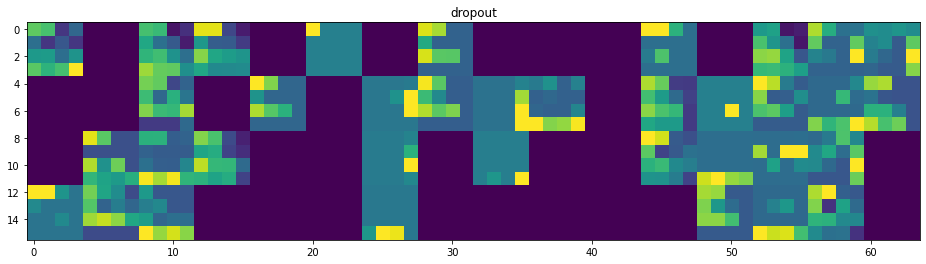

In [19]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from PIL import *
import PIL.Image
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[100]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

layer_outputs = [layer.output for layer in model4.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model4.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
layer_names = []
for layer in model4.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

## Experiment 5 Vision Transformer

Image size: 72 X 72
Patch size: 4 X 4
Patches per image: 324
Elements per patch: 48


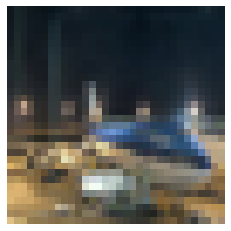

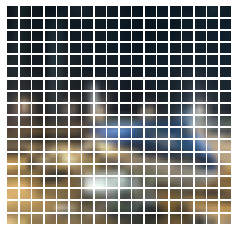

In [20]:
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

wd = 0.0001
lr = 0.001
batch = 128
epochs = 120
image_size = 72
patch_size = 4
patch_dist = 18**2
projection = 64
num_heads = 4
transformer_val = [128, 64]
layers = 8
mlp_head_units = [2048, 1024]
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.Normalization(),
        keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
        keras.layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
data_augmentation.layers[0].adapt(x_train)
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = keras.layers.Dense(units, activation=tf.nn.gelu)(x)
        x = keras.layers.Dropout(dropout_rate)(x)
    return x

class Patches(keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch, -1, patch_dims])
        return patches
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [21]:
class PatchEncoder(keras.layers.Layer):
    def __init__(self, patch_dist, projection):
        super(PatchEncoder, self).__init__()
        self.patch_dist = patch_dist
        self.projection = keras.layers.Dense(units=projection)
        self.position_embedding = keras.layers.Embedding(
            input_dim=patch_dist, output_dim=projection
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.patch_dist, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = keras.layers.Input(shape=(32, 32, 3))
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(patch_dist, projection)(patches)

    for _ in range(layers):
        x1 = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection, dropout=0.1
        )(x1, x1)
        x2 = keras.layers.Add()([attention_output, encoded_patches])
        x3 = keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_val, dropout_rate=0.1)
        encoded_patches = keras.layers.Add()([x3, x2])
    representation = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = keras.layers.Flatten()(representation)
    representation = keras.layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = keras.layers.Dense(10)(features)
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        lr=lr, weight_decay=wd)
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),],)
    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,)
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],)
    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history

vit_classifier = create_vit_classifier()
history6 = run_experiment(vit_classifier)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/120
352/352 [==============================] - 138s 367ms/step - loss: 2.1205 - accuracy: 0.3051 - top-5-accuracy: 0.8020 - val_loss: 1.4919 - val_accuracy: 0.4628 - val_top-5-accuracy: 0.9150
Epoch 2/120
352/352 [==============================] - 127s 360ms/step - loss: 1.5564 - accuracy: 0.4402 - top-5-accuracy: 0.9022 - val_loss: 1.2725 - val_accuracy: 0.5432 - val_top-5-accuracy: 0.9468
Epoch 3/120
352/352 [==============================] - 127s 360ms/step - loss: 1.3801 - accuracy: 0.5094 - top-5-accuracy: 0.9260 - val_loss: 1.1461 - val_accuracy: 0.5914 - val_top-5-accuracy: 0.9630
Epoch 4/120
352/352 [==============================] - 127s 360ms/step - loss: 1.2720 - accuracy: 0.5504 - top-5-accuracy: 0.9401 - val_loss: 1.0341 - val_accuracy: 0.6404 - val_top-5-accuracy: 0.9670
Epoch 5/120
352/352 [==============================] - 127s 360ms/step - loss: 1.1872 - accuracy: 0.5814 - top-5-accuracy: 0.9486 - val_loss: 0.9811 - val_accuracy: 0.6598 - val_top-5-accuracy: 0.

In [22]:
y_pred=pd.DataFrame(vit_classifier.predict(x_test))
y_pred['y_pred'] = y_pred.idxmax(axis=1)
y_pred['true_value']=y_test

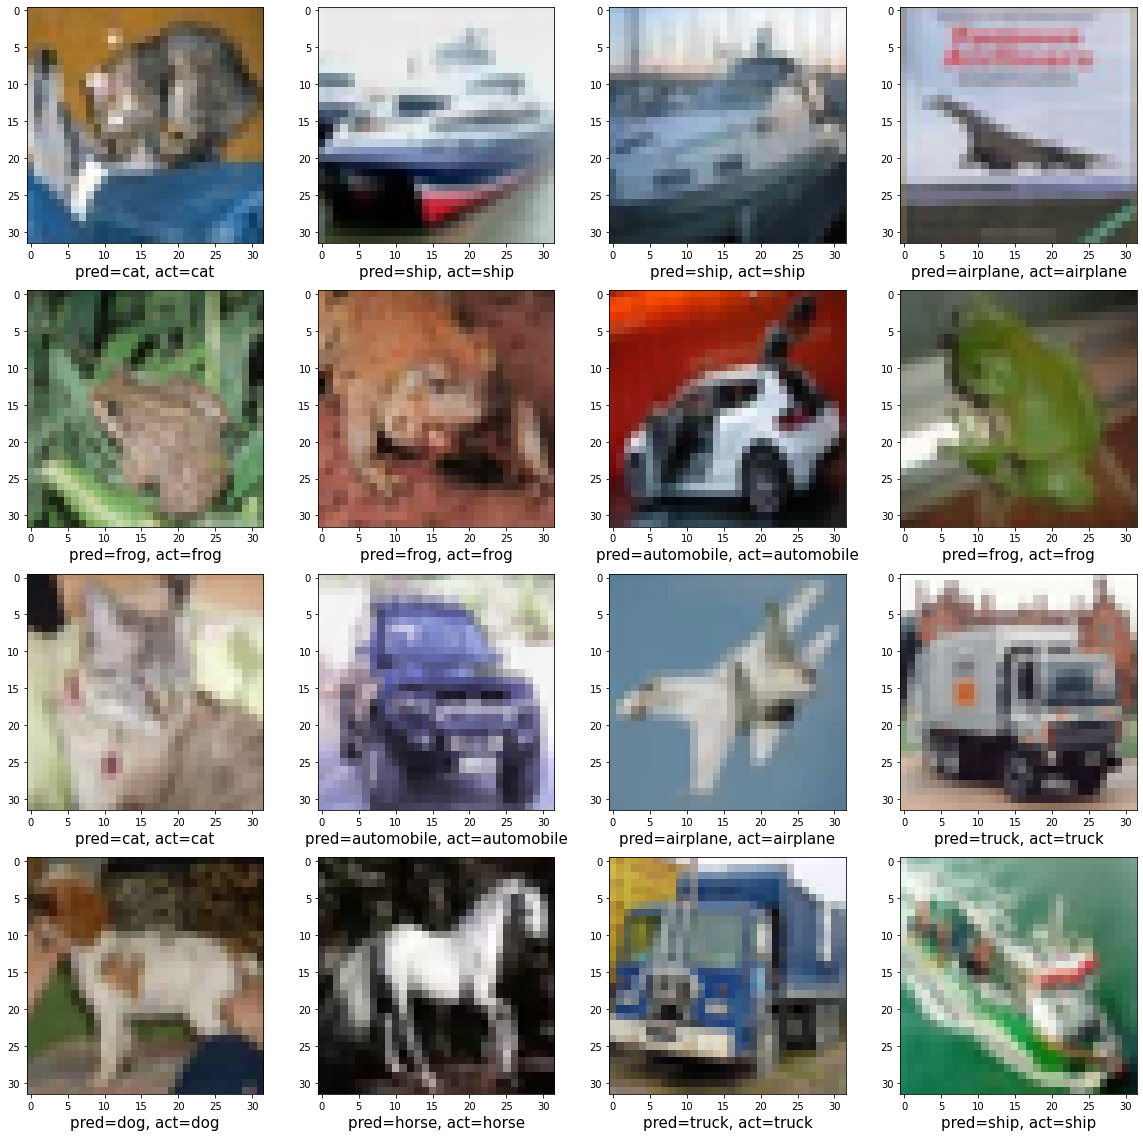

In [23]:
y_pred = y_pred['y_pred'].to_numpy()
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()

### It seems like the patches were too small in the prior model to pick up the necessary features. However, this shows the improvement a Transformer makes on image classification over a CNN.

### Final Experiment

##### We have to redefine all functionas as the patch size was hard coded in my prior example.

Image size: 72 X 72
Patch size: 8 X 8
Patches per image: 81
Elements per patch: 192


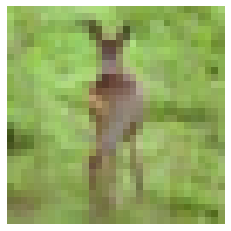

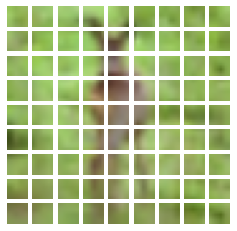

In [24]:
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

wd = 0.0001
lr = 0.001
batch = 256
epochs = 80
image_size = 72
patch_size = 8
patch_dist = 9**2
projection = 64
num_heads = 4
transformer_val = [128, 64]
layers = 8
mlp_head_units = [2048, 1024]
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.Normalization(),
        keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
        keras.layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
data_augmentation.layers[0].adapt(x_train)
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = keras.layers.Dense(units, activation=tf.nn.gelu)(x)
        x = keras.layers.Dropout(dropout_rate)(x)
    return x

class Patches(keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch, -1, patch_dims])
        return patches
plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [25]:
class PatchEncoder(keras.layers.Layer):
    def __init__(self, patch_dist, projection):
        super(PatchEncoder, self).__init__()
        self.patch_dist = patch_dist
        self.projection = keras.layers.Dense(units=projection)
        self.position_embedding = keras.layers.Embedding(
            input_dim=patch_dist, output_dim=projection
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.patch_dist, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = keras.layers.Input(shape=(32, 32, 3))
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(patch_dist, projection)(patches)

    for _ in range(layers):
        x1 = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection, dropout=0.1
        )(x1, x1)
        x2 = keras.layers.Add()([attention_output, encoded_patches])
        x3 = keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_val, dropout_rate=0.1)
        encoded_patches = keras.layers.Add()([x3, x2])
    representation = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = keras.layers.Flatten()(representation)
    representation = keras.layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = keras.layers.Dense(10)(features)
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        lr=lr, weight_decay=wd)
    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),],)
    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,)
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],)
    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    return history

vit_classifier = create_vit_classifier()
history6 = run_experiment(vit_classifier)

Epoch 1/80
176/176 [==============================] - 36s 144ms/step - loss: 2.0134 - accuracy: 0.3128 - top-5-accuracy: 0.8099 - val_loss: 1.5067 - val_accuracy: 0.4574 - val_top-5-accuracy: 0.9174
Epoch 2/80
176/176 [==============================] - 24s 137ms/step - loss: 1.5589 - accuracy: 0.4408 - top-5-accuracy: 0.8994 - val_loss: 1.3280 - val_accuracy: 0.5244 - val_top-5-accuracy: 0.9426
Epoch 3/80
176/176 [==============================] - 24s 137ms/step - loss: 1.4031 - accuracy: 0.4944 - top-5-accuracy: 0.9251 - val_loss: 1.2145 - val_accuracy: 0.5608 - val_top-5-accuracy: 0.9496
Epoch 4/80
176/176 [==============================] - 24s 137ms/step - loss: 1.3067 - accuracy: 0.5331 - top-5-accuracy: 0.9366 - val_loss: 1.1338 - val_accuracy: 0.6018 - val_top-5-accuracy: 0.9608
Epoch 5/80
176/176 [==============================] - 24s 137ms/step - loss: 1.2280 - accuracy: 0.5647 - top-5-accuracy: 0.9456 - val_loss: 1.0566 - val_accuracy: 0.6284 - val_top-5-accuracy: 0.9648
Epoch

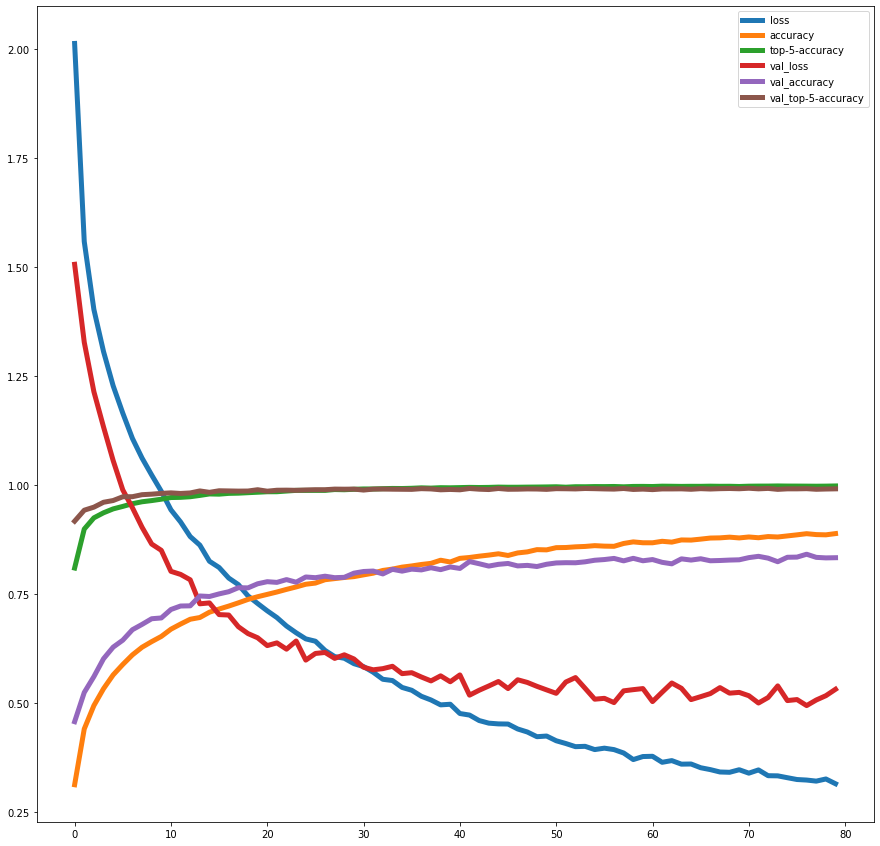

In [26]:
plt.figure(figsize=(15,15))
history6_df=pd.DataFrame(history6.history)
plt.plot(history6_df, linewidth=5)
plt.legend(history6_df.columns.to_list())
plt.show()